In [26]:
import pandas as pd

# Diccionario con los años y los IDs de los archivos en Google Drive.
archivos_demre = {
    2019: '19Ryp-S95tJTOYAimrUBChcGB-2lJw4sh',
    2020: '1OqSyomh5-kQSeyhLZXfva4WTPINYHgsj',
    2021: '1eNO3lge5flk_K7dviaJxLKjmF9EHQ9Np',
    2022: '1g14GDc-M514I5v5ZsvF96HVba6DW1z0q',
    2023: '1lV6AJqJd8-_iFuak8o_j2jK5mQDnUbRR',
    2024: '1aAlikLl_8YRwGX4B2Kxfc6aza4vmHknE',
    2025: '1VnfLntwHjBfKmlzI9BE8sW49c8hNl_D0'
}

lista_de_dataframes = []

print("Iniciando proceso de unificación...")

# Usamos un bucle para recorrer cada año y cada ID en nuestro diccionario.
for anio, file_id in archivos_demre.items():
    try:
        # Construimos la URL de descarga para el archivo actual
        url = f'https://drive.google.com/uc?export=download&id={file_id}'

        # Leemos el CSV desde la URL
        print(f"-> Cargando datos del año {anio}...")
        df_temporal = pd.read_csv(url, sep=';')

        df_temporal['anio_proceso'] = anio

        # Agregamos el DataFrame de este año a nuestra lista.
        lista_de_dataframes.append(df_temporal)
        print(f"   ...Datos del año {anio} cargados con éxito.")

    except Exception as e:
        print(f"   !!! Error al cargar el año {anio}: {e}")


Iniciando proceso de unificación...
-> Cargando datos del año 2019...
   ...Datos del año 2019 cargados con éxito.
-> Cargando datos del año 2020...
   ...Datos del año 2020 cargados con éxito.
-> Cargando datos del año 2021...
   ...Datos del año 2021 cargados con éxito.
-> Cargando datos del año 2022...
   ...Datos del año 2022 cargados con éxito.
-> Cargando datos del año 2023...
   ...Datos del año 2023 cargados con éxito.
-> Cargando datos del año 2024...


C:\Users\marti\AppData\Local\Temp\ipykernel_10652\3312889100.py:26: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temporal = pd.read_csv(url, sep=';')


   ...Datos del año 2024 cargados con éxito.
-> Cargando datos del año 2025...


C:\Users\marti\AppData\Local\Temp\ipykernel_10652\3312889100.py:26: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temporal = pd.read_csv(url, sep=';')


   ...Datos del año 2025 cargados con éxito.


# EDA desde 2020 hasta 2025

In [27]:
print('Año  |  Cantidad de columnas')
for df in lista_de_dataframes:
    print(f'{df['anio_proceso'][0]} |          {len(df.columns)}')

Año  |  Cantidad de columnas
2019 |          26
2020 |          27
2021 |          27
2022 |          27
2023 |          29
2024 |          36
2025 |          37


## Sabemos que desde 2022 se comenzó a hacer una prueba de invierno, por esto han aumentado respecto a años anteriores la cantidad de datos en los csv, esto nos da la necesidad de normalizar las columnas para quedarnos con un mismo nombre en cada DataFrame. 

In [29]:
print(lista_de_dataframes[0].columns)
print(lista_de_dataframes[1].columns)
print(lista_de_dataframes[2].columns)
print(lista_de_dataframes[3].columns)

Index(['ID_aux', 'RBD', 'COD_ENS', 'GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL',
       'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA', 'PROMEDIO_NOTAS',
       'PTJE_NEM', 'PTJE_RANKING', 'LENG_ACTUAL', 'MATE_ACTUAL', 'HCSO_ACTUAL',
       'CIEN_ACTUAL', 'MODULO_ACTUAL', 'PROMEDIO_LM_ACTUAL',
       'PERCENTIL_LM_ACTUAL', 'LENG_ANTERIOR', 'MATE_ANTERIOR',
       'HCSO_ANTERIOR', 'CIEN_ANTERIOR', 'MODULO_ANTERIOR',
       'PROMEDIO_LM_ANTERIOR', 'PERCENTIL_LM_ANTERIOR', 'anio_proceso'],
      dtype='object')
Index(['ID_aux', 'RBD', 'COD_ENS', 'GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL',
       'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA', 'PROMEDIO_NOTAS',
       'PORC_SUP_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'LENG_ACTUAL',
       'MATE_ACTUAL', 'HCSO_ACTUAL', 'CIEN_ACTUAL', 'MODULO_ACTUAL',
       'PROMEDIO_LM_ACTUAL', 'PERCENTIL_LM_ACTUAL', 'LENG_ANTERIOR',
       'MATE_ANTERIOR', 'HCSO_ANTERIOR', 'CIEN_ANTERIOR', 'MODULO_ANTERIOR',
       'PROMEDIO_LM_ANTERIOR', 'PERCENTIL_LM_AN

In [30]:
print(lista_de_dataframes[4].columns)
print(lista_de_dataframes[5].columns)
print(lista_de_dataframes[6].columns)

Index(['ID_aux', 'RBD', 'COD_ENS', 'GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL',
       'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA', 'PROMEDIO_NOTAS',
       'PORC_SUP_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'CLEC_REG_ACTUAL',
       'MATE1_REG_ACTUAL', 'MATE2_REG_ACTUAL', 'HCSOC_REG_ACTUAL',
       'CIEN_REG_ACTUAL', 'MODULO_REG_ACTUAL', 'CLEC_INV_ACTUAL',
       'MATE_INV_ACTUAL', 'HCSOC_INV_ACTUAL', 'CIEN_INV_ACTUAL',
       'MODULO_INV_ACTUAL', 'CLEC_REG_ANTERIOR', 'MATE1_REG_ANTERIOR',
       'HCSOC_REG_ANTERIOR', 'CIEN_REG_ANTERIOR', 'MODULO_REG_ANTERIOR',
       'anio_proceso'],
      dtype='object')
Index(['ID_aux', 'RBD', 'COD_ENS', 'GRUPO_DEPENDENCIA', 'RAMA_EDUCACIONAL',
       'SITUACION_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA', 'PROMEDIO_NOTAS',
       'PORC_SUP_NOTAS', 'PTJE_NEM', 'PTJE_RANKING', 'CLEC_REG_ACTUAL',
       'MATE1_REG_ACTUAL', 'MATE2_REG_ACTUAL', 'HCSOC_REG_ACTUAL',
       'CIEN_REG_ACTUAL', 'MODULO_REG_ACTUAL', 'CLEC_INV_ACTUAL',
       'MATE1_INV_ACTUAL'

## Viendo las columnas hemos decidido enfocarnos en los datos de las pruebas que se han rendido en verano, esto porque la implementación de la prueba en invierno es reciente (En el año 2022 fue rendida la primera prueba de invierno), por esto contamos con menos datos para trabajar y eso nos hace más difícil hacer conclusiones respecto a estos.

- Haremos una función que reciba un DataFrame y modifique los nombres de sus columnas, esto porque la prueba a cambiado de formato a lo largo de los años, dando la necesidad de modificar y normalizar sus columnas, evitando tener muchas columnas con nombres distintos, además estaremos quedándonos solo con datos de la última rendición de cada persona en verano.

In [31]:
def normalizar_nombres_y_filtrar(df):
    df_limpio = df.copy()
    mapa_renombre = {
        'ID_aux': 'id_estudiante',
        'RBD': 'id_colegio_rbd',
        'GRUPO_DEPENDENCIA': 'dependencia_colegio',
        'RAMA_EDUCACIONAL': 'rama_educacional',
        'SITUACION_EGRESO': 'situacion_egreso',
        'CODIGO_REGION': 'cod_region',
        'CODIGO_COMUNA': 'cod_comuna',
        'PROMEDIO_NOTAS': 'promedio_notas',
        'PTJE_NEM': 'puntaje_nem',
        'PTJE_RANKING': 'puntaje_ranking',
        'LENG_ACTUAL': 'puntaje_lectora',
        'CLEC_ACTUAL': 'puntaje_lectora',
        'CLEC_REG_ACTUAL': 'puntaje_lectora',

        'MATE_ACTUAL': 'puntaje_m1',
        'MATE1_REG_ACTUAL': 'puntaje_m1',

        'MATE2_REG_ACTUAL': 'puntaje_m2',

        'HCSO_ACTUAL': 'puntaje_historia',
        'HCSOC_REG_ACTUAL': 'puntaje_historia',

        'CIEN_ACTUAL': 'puntaje_ciencias',
        'CIEN_REG_ACTUAL': 'puntaje_ciencias',
        'MODULO_ACTUAL': 'tipo_ciencia',
        'MODULO_REG_ACTUAL': 'tipo_ciencia'
    }

    # Aplicamos el nuevo nombre de las columnas
    df_limpio.rename(columns=mapa_renombre, inplace=True)

    # Filtramos solo por las columnas que usaremos
    columnas_finales = [
        'id_estudiante', 'id_colegio_rbd', 'anio_proceso', 'dependencia_colegio', 'situacion_egreso','rama_educacional',
        'cod_region', 'cod_comuna', 'promedio_notas', 'puntaje_nem', 'puntaje_ranking',
        'puntaje_lectora', 'puntaje_m1', 'puntaje_m2', 'puntaje_historia', 'puntaje_ciencias', 'tipo_ciencia'
    ]

    # Filtramos para retornar solo las columnas que estén, existen años en los que no existía la M2 y esto nos ayuda a evitar errores.
    columnas_existentes_en_df = [col for col in columnas_finales if col in df_limpio.columns]
    
    return df_limpio[columnas_existentes_en_df]

In [32]:
lista_final = []
for df in lista_de_dataframes:
    # Aplica la función de limpieza
    df_limpio = normalizar_nombres_y_filtrar(df)
    lista_final.append(df_limpio)

df_final = pd.concat(lista_final, ignore_index=True)

df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974833 entries, 0 to 1974832
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   id_estudiante        object 
 1   id_colegio_rbd       float64
 2   anio_proceso         int64  
 3   dependencia_colegio  float64
 4   situacion_egreso     float64
 5   rama_educacional     object 
 6   cod_region           float64
 7   cod_comuna           float64
 8   promedio_notas       object 
 9   puntaje_nem          int64  
 10  puntaje_ranking      int64  
 11  puntaje_lectora      float64
 12  puntaje_m1           float64
 13  puntaje_historia     float64
 14  puntaje_ciencias     float64
 15  tipo_ciencia         object 
 16  puntaje_m2           float64
dtypes: float64(10), int64(3), object(4)
memory usage: 256.1+ MB


In [33]:
import numpy as np

# Reemplazamos las comas por . para pasar a float.
df_final['promedio_notas'] = df_final['promedio_notas'].str.replace(',', '.').astype(float).replace(0.0, np.nan)
df_final['puntaje_nem'] = df_final['puntaje_nem'].replace(0, np.nan)
df_final['puntaje_ranking'] = df_final['puntaje_ranking'].replace(0, np.nan)
# Cambiamos a tipo category las columnas que tienen pocos datos unicos, esto para reducir el espacio que usan en el DataFrame.
df_final['anio_proceso'] = df_final['anio_proceso'].astype('category')
df_final['tipo_ciencia'] = df_final['tipo_ciencia'].astype('category')
df_final['rama_educacional'] = df_final['rama_educacional'].astype('category')
df_final['cod_region'] = df_final['cod_region'].astype('category')
df_final['cod_comuna'] = df_final['cod_comuna'].astype('category')
df_final['situacion_egreso'] = df_final['situacion_egreso'].astype('category')
df_final['dependencia_colegio'] = df_final['dependencia_colegio'].astype('category')
df_final['id_colegio_rbd'] = df_final['id_colegio_rbd'].astype('category')

# Pasamos a int los datos que estaban como float.
df_final['puntaje_lectora'] = df_final['puntaje_lectora'].replace(0, np.nan).astype('Int64')
df_final['puntaje_m1'] = df_final['puntaje_m1'].replace(0, np.nan).astype('Int64')
df_final['puntaje_historia'] = df_final['puntaje_historia'].replace(0, np.nan).astype('Int64')
df_final['puntaje_ciencias'] = df_final['puntaje_ciencias'].replace(0, np.nan).astype('Int64')
df_final['puntaje_m2'] = df_final['puntaje_m2'].replace(0, np.nan).astype('Int64')

## Con el DataFrame creado a partir de datos de la prueba en verano podemos ver que se redujo el espacio que pesaba el DataFrame. También podemos ver que entre el año 2020 y el año 2025 tenemos 1696546 personas que han rendido la prueba de admisión a la educación superior.

In [34]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974833 entries, 0 to 1974832
Data columns (total 17 columns):
 #   Column               Dtype   
---  ------               -----   
 0   id_estudiante        object  
 1   id_colegio_rbd       category
 2   anio_proceso         category
 3   dependencia_colegio  category
 4   situacion_egreso     category
 5   rama_educacional     category
 6   cod_region           category
 7   cod_comuna           category
 8   promedio_notas       float64 
 9   puntaje_nem          float64 
 10  puntaje_ranking      float64 
 11  puntaje_lectora      Int64   
 12  puntaje_m1           Int64   
 13  puntaje_historia     Int64   
 14  puntaje_ciencias     Int64   
 15  tipo_ciencia         category
 16  puntaje_m2           Int64   
dtypes: Int64(5), category(8), float64(3), object(1)
memory usage: 164.0+ MB


## Ya con los datos listos podemos ver las estadísticas y notar que hacen sentido.

In [35]:
df_final.describe()

,promedio_notas,puntaje_nem,puntaje_ranking,puntaje_lectora,puntaje_m1,puntaje_historia,puntaje_ciencias,puntaje_m2
count,1.953978e+06,1.953978e+06,1.953978e+06,1702073.0,1679617.0,1013951.0,1114252.0,330787.0
mean,5.857374e+00,6.325505e+02,6.517390e+02,548.143064,542.111561,516.773167,497.785739,421.391859
std,5.184014e-01,1.429157e+02,1.563408e+02,129.539836,133.654782,122.762665,109.175378,107.952836
min,4.000000e+00,1.000000e+02,1.000000e+02,100.0,100.0,100.0,100.0,100.0
25%,5.450000e+00,5.230000e+02,5.280000e+02,460.0,454.0,424.0,420.0,351.0
50%,5.850000e+00,6.220000e+02,6.400000e+02,540.0,524.0,505.0,488.0,399.0
75%,6.250000e+00,7.320000e+02,7.670000e+02,631.0,608.0,595.0,567.0,459.0
max,7.000000e+00,1.000000e+03,1.000000e+03,1000.0,1000.0,1000.0,1000.0,1000.0


In [36]:
df_final

,id_estudiante,id_colegio_rbd,anio_proceso,dependencia_colegio,situacion_egreso,rama_educacional,cod_region,cod_comuna,promedio_notas,puntaje_nem,puntaje_ranking,puntaje_lectora,puntaje_m1,puntaje_historia,puntaje_ciencias,tipo_ciencia,puntaje_m2
0,id_0000900070019,22388.0,2019,2.0,5.0,H2,14.0,14101.0,6.33,691.0,731.0,572,<NA>,<NA>,<NA>,NaN,<NA>
1,id_0000900270084,1.0,2019,3.0,5.0,T2,15.0,15101.0,5.93,607.0,664.0,362,403,<NA>,402,BIO,<NA>
2,id_0000900370016,14210.0,2019,2.0,5.0,H1,5.0,5502.0,5.88,596.0,601.0,598,403,696,565,BIO,<NA>
3,id_0000900370067,1437.0,2019,2.0,5.0,H1,5.0,5502.0,5.48,513.0,513.0,618,329,587,449,BIO,<NA>
4,id_0000900370092,1422.0,2019,3.0,1.0,H2,5.0,5502.0,5.05,426.0,426.0,380,446,336,367,QUI,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974828,id_5995599440825,9986.0,2025,3.0,1.0,T1,13.0,13126.0,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,NaN,<NA>
1974829,id_4895488246247,NaN,2025,NaN,4.0,H4,NaN,NaN,NaN,NaN,NaN,605,700,542,502,BIO,<NA>
1974830,id_9866988747313,9140.0,2025,2.0,5.0,H1,13.0,13122.0,6.28,793.0,856.0,746,589,<NA>,665,BIO,362
1974831,id_5866598447255,2733.0,2025,3.0,5.0,H1,7.0,7301.0,5.68,622.0,631.0,<NA>,<NA>,<NA>,<NA>,NaN,<NA>


## Por último vamos a graficar estos datos, notando que tenemos 1.6 millones tendremos que recurrir a una muestra más pequeña al azar que muestre el comportamiento de nuestros datos, esto funciona como muestra porque evitamos algún sesgo al ser elegidos al azar, también es necesario porque es inviable ver tantos datos en un gráfico.
- Otra cosa que notar antes de graficar es que a lo largo de los años cambió el puntaje máximo, esto puede estar afectando a nuestros datos en cuanto a promedios y el tema estadístico, más adelante cuando separemos por PSU, PDT, PAES se solcucionará esto.

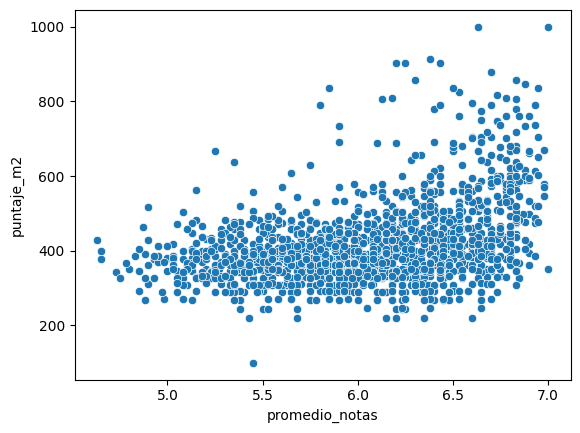

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

df_muestra = df_final.sample(n=10000)

# Ahora haz el gráfico usando esta muestra más pequeña
sns.scatterplot(data=df_muestra, x='promedio_notas', y='puntaje_m2')
plt.show()

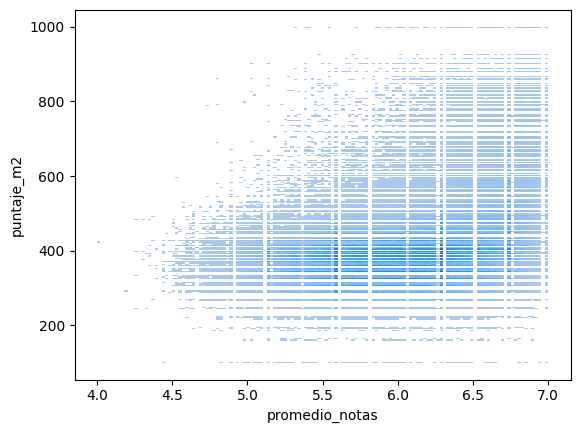

In [38]:
sns.histplot(data=df_final, x='promedio_notas', y='puntaje_m2')
plt.show()